In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.distributions.normal_mixture_distribution import NormalMixture
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 1500

In [3]:
def model():
    numpyro.sample('x', NormalMixture(np.array([1/3, 2/3]), 
                                      np.array([-2., 2.]), np.array([1., 1.])))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': -10.}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

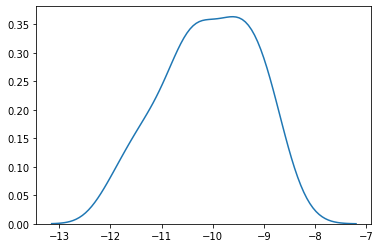

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])


In [6]:
for i in range(num_iterations):
    svgd_state, loss = svgd.update(svgd_state)
    if i % 100 == 0:
        print(loss)

35.02896
2.4103324
2.3441906
2.2906945
2.250157
2.2187533
2.1914883
2.1674292
2.1464517
2.1281803
2.1126223
2.098777
2.0871584
2.0768902
2.0676298


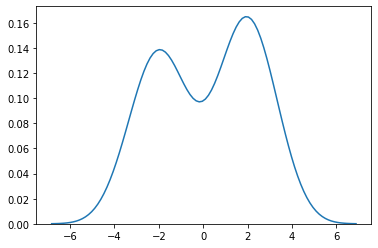

In [7]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'])

In [8]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([ 2.671905  ,  2.5498624 ,  2.4567525 , -1.7916422 ,
             -2.4764545 ,  2.3986194 ,  3.3567429 ,  1.0665727 ,
              1.0248173 , -2.3803082 , -0.74167454, -1.459101  ,
             -0.8998077 ,  2.2596834 ,  2.0163922 , -3.0595639 ,
              2.299792  ,  3.8096077 ,  2.3088472 , -1.7808411 ,
              0.722745  , -2.106391  ,  0.09664714,  2.8335016 ,
             -2.0655556 , -1.3763142 , -0.28782955, -2.1046572 ,
             -1.447416  , -1.6430272 ,  1.9033012 ,  1.6552478 ,
             -3.073885  ,  0.92351997, -0.4105145 ,  2.9336386 ,
              2.7629476 , -1.1049707 ,  2.496698  ,  2.236243  ,
              2.7372608 ,  3.2116373 , -1.2196188 ,  0.71479607,
             -1.8964713 ,  0.37488925,  3.6840243 ,  1.8472971 ,
              2.0778718 , -3.3064363 ,  1.8746487 , -2.8998454 ,
             -1.3944776 , -3.5965993 ,  0.566532  , -2.3809462 ,
              3.0167918 , -0.8950553 ,  1.9817635 ,  3.4543061 ,
              1.4373208 ,